# Calculation of coherent elastic neutrino-nucleus scattering CE$\nu$NS

In this notebook we outline how to generate CE$\nu$NS rate. First we show how to do it for the SM and then for non-zero NSI parameters. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from snudd import config
from snudd.targets import Nucleus
from snudd.models import GeneralNSI

Setting up the target of the DD experiment:

In [3]:
Xe_nucleus = Nucleus(54, 132, mass=131.9041535 * config.u) # only do one isotope for this example 

## SM CE$\nu$NS scattering rate 

We generate an instance of the SM (in terms of zero NSI) and compute and plot the theoretical (i.e. without including any experimental effects) CE$\nu$NS rate in Xe.

In [4]:
SM_matrix = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]])

SM_eta = 0
SM_phi = 0

sm_model = GeneralNSI(SM_matrix, SM_eta, SM_phi)

Update the nucleus object with the NSI model, i.e. the SM in this case.

In [5]:
Xe_nucleus.update_model(sm_model)
Xe_nucleus.prepare_density()

In [6]:
E_Rs = np.logspace(-2, 2, 1000) / 1e6  # Recoil Energy in GeV

In [7]:
sm_spec=Xe_nucleus.spectrum(E_Rs)

(1e-05, 1000000.0)

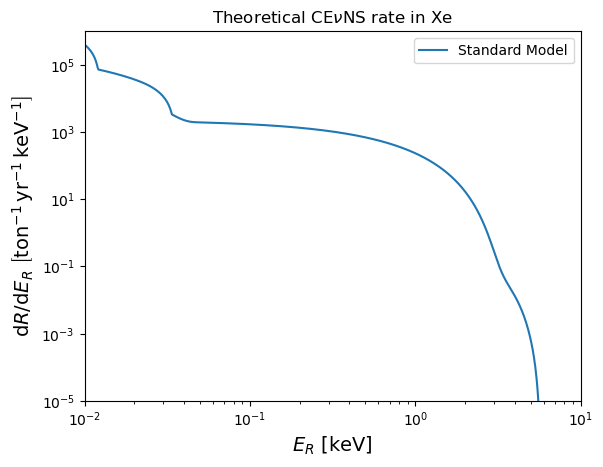

In [8]:
plt.loglog(E_Rs*1e6, abs(sm_spec), label="Standard Model") # abs because of the residual imaginary part from the density matrix. All elements have zero imaginary part anyway.

plt.legend()
plt.title(r"Theoretical CE$\nu$NS rate in Xe")
plt.ylabel(r'${\rm d}R/{\rm d}E_R\,\,\left[{\rm ton}^{-1}\,{\rm yr}^{-1}\,{\rm keV}^{-1}\right]$', size=14)
plt.xlabel(r'$E_{R}\,\,\left[{\rm keV}\right]$', size=14)

plt.xlim(xmin=1e-2, xmax=1e1)
plt.ylim(ymax=1e6, ymin=1e-5)

## NSI CE$\nu$NS scattering rate 

Now do the same for a non-zero NSI $\varepsilon_{\mu\tau}=0.1$ coupling with equal strength to protons and neutrons ($\eta=\pi/4$).

In [9]:
NSI_matrix = np.array([[0.0, 0.0, 0.0],
                       [0.0, 0.0, 0.1],
                       [0.0, 0.1, 0.0]])

NSI_eta = np.pi/4
NSI_phi = 0

NSI_model = GeneralNSI(NSI_matrix, NSI_eta, NSI_phi)

Update the nucleus object with the new NSI model and compute the new spectrum.

In [10]:
Xe_nucleus.update_model(NSI_model)
Xe_nucleus.prepare_density()

In [11]:
NSI_spec=Xe_nucleus.spectrum(E_Rs)

Plotting the SM and NSI spectra.

(1e-05, 1000000.0)

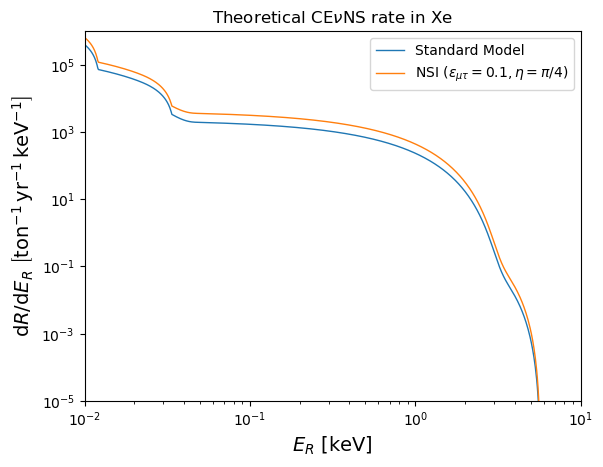

In [12]:
plt.loglog(E_Rs*1e6, abs(sm_spec), lw=1, label="Standard Model")
plt.loglog(E_Rs*1e6, abs(NSI_spec), lw=1, label=r"NSI ($\varepsilon_{\mu\tau}=0.1, \eta=\pi/4$)")

plt.legend()
plt.title(r"Theoretical CE$\nu$NS rate in Xe")
plt.ylabel(r'${\rm d}R/{\rm d}E_R\,\,\left[{\rm ton}^{-1}\,{\rm yr}^{-1}\,{\rm keV}^{-1}\right]$', size=14)
plt.xlabel(r'$E_{R}\,\,\left[{\rm keV}\right]$', size=14)

plt.xlim(xmin=1e-2, xmax=1e1)
plt.ylim(ymax=1e6, ymin=1e-5)